Name       : Brion Mallon

Student no : 1756894 

C A 1 B    : Write 4 optomise functions and test these against 2 forulas 

Input      :  

Process    : Apply the following actions 

           - Create four optomise functions for following
                1) random search 
                2) hillclimbing 
                3) gradient descent/ascent 
                4) Simulated annealing
                
           - Test each of the above functions using 2 provided functions (line functions), graph all outputs


##### import any standard libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 
%matplotlib inline

##### Add functions for CA_1B questions 1 and 2

    1) minimise y = (x - 1)^2 (starting at x=0) 
    2) minimise y = x(x+1.5)(x-1.5)(x-2) (starting at first x=0, then separately, starting at x=1)

In [34]:
def f_Q1(x):
    return (x-1)**2

def f_Q1_slope(x):
    return (2*x)-2

def f_Q2(x):
    return x*(x+1.5)*(x-1.5)*(x-2)

def f_Q2_slope(x):
    return 4*(x**3) - 6*(x**2) -4.5*(x)+4.5

def f_Q3(x):
    return 2*(((x+1)**3)**4)*2.1

##### Add the 4 Optomise functions as follows

1) random search 
2) hillclimbing 
3) gradient descent/ascent 
4) Simulated annealing

In [3]:
#
#  random search function 

def RandSearch(func='',times=0,start=0,end=0):
    #  This function is a random optomizing search process 
    #  it will call a requested function a given number of times and save the lowest returned Y value
    #  inputs:
    #      Func      = Function to call 
    #      times     = Number of instances the function shall be called
    #      start     = start of range for the random numbers 
    #      end       = End of range for random numbers 
    #  outputs:   
    #      list of 2 tuples containing all points searched, Also a seperate list with only the lowest value (minimum)
    try:
        # initialise variables
        outlist = list()
        
        # set the current optomise value to highest possible (use max random value as X) 
        currentOptValue_x = end
        currentOptValue_y = func(currentOptValue_x)
        
        # process all requests (number of times), 
        # each call of the function will have a random number from within the range provided 
        for i in range(times):
            
            # Get random number and call function to return Y value (using random number)
            x = random.uniform(start,end)
            y = func(x)
            outlist.append((x,y))
            
            # Save the lowest value (minimum) for Y, also return this result 
            if y < currentOptValue_y:
                currentOptValue_y = y
                currentOptValue_x = x   
                
        result = [(currentOptValue_x,currentOptValue_y)]
        return (outlist,result)
    except:
        print ('error in  RandSearch')
        return 

#
#    HillClimb Function  
    
def HillClimb(func='',start=0,steps=0.0):
    #  This function is a bidirectional hillclimp (minimise) optomise search process 
    #  inputs:
    #      Func      = Function to call 
    #      start     = start position for hillclimb (decent)
    #      step      = number to move forward 
    #  outputs:   
    #      list of 2 tuples containing all points searched, Also a seperate list with only the lowest value (minimum)
    try:
        # initialise variables
        outlist     = list()
        currentlist = list()
        step        = steps   
        currentpos  = start
        nextX       = 0.0
        nextY       = 0.0
        calcpos     = 0.0
        #
        #  Determine if decend to left or right (get current Y, then test against negbhours)
        #  
        currentlist.append((currentpos,func(currentpos)))
        nextX = currentpos + step
        nextY = func(nextX)
        
        
        # if the Next Y is > current Y then must go left (make the Step value a minus for reverse search)
        if nextY > currentlist[0][1]:
            nextX = currentpos - step
            nextY = func(nextX) 
            # convert the step into a minus of itself, this will allow for reverse stepping 
            step -= step*2 
        
        # add the next to the current list (this list will always have 2 entries )    
        currentlist.append((nextX,nextY))
        
         # Now that the direction has been determined, search until (local) minimum is found
        while True:
            # Save current to final list
            outlist.append(currentlist[0])
        
            # Test if minimum point reached  (current Y value < next Y value) 
            if currentlist[0][1]  < currentlist[1][1]:
                result = [(currentlist[0][0],currentlist[0][1])]
                return(outlist,result)
   
            # Make next Y the current Y and then get next Y  (drop the current Y from the list, then append next Y from function)
            currentpos += step
            del currentlist[0]
            calcpos = currentpos + step
            nextY = func(calcpos)
            currentlist.append((calcpos,nextY))
    except:
        print ('error in HillClimb')
        return 
    

def  GradientDecent(Curvefunc='' ,SlopeFunc='' , start=0, steps=0):
    #start= 0, gamma = 0.002, precision = 0.00001
    #  This function is a Gradient descent (minimise) optomise search process 
    #  inputs:
    #      CurveFunc =  curve Function to call 
    #      Func      =  slope Function to call 
    #      start     = start position for graident descent 
    #      step      = number to move forward 
    #  outputs:   
    #      list of 2 tuples containing all points searched, Also a seperate list with only the lowest value (minimum)
    try:
        # initialise variables
        outlist     = list()
        step        = steps   
        nextX       = 0.0
        nextY       = 0.0
        currentX    = start
        currentY    = 0.0
        
        # Get Y for current X
        currentY = Curvefunc(currentX)
        
        #Get next X and Y
        nextX = currentX - (step * SlopeFunc(currentX))
        nextY = Curvefunc(nextX)
        
        # loop until gradient starts to accend)
        while (currentY > nextY ):
            outlist.append((currentX,currentY))
            currentX = nextX
            currentY = nextY
            nextX = currentX - step * SlopeFunc(currentX)    
            nextY = Curvefunc(nextX)
        result = [(currentX,currentY)]
        return(outlist,result) 
 
    except:
        print ('error in GradientDecent ')
        return 

#
#  Sim Annealing function 

def Sim_Annealing(func='',times=0,start=0,end=0):
    #  This function is Sim Annealing search process 
    #  it will call a requested function a given number of times and save the lowest returned Y value
    #  inputs:
    #      Func      = Function to call 
    #      times     = Number of instances the function shall be called
    #      start     = start of range for the random numbers 
    #      end       = End of range for random numbers 
    #  outputs:   
    #      list of 2 tuples containing all points searched, Also a seperate list with only the lowest value (minimum)
    try:
        old_X = random.uniform(start,end)
        old_Y = func(old_X)
        min_X = old_X
        min_Y = old_Y
        Temp = 1.0
        Temp_min = 0.0001
        step = 0.9
        e=2.71828
        outlist=list()
        #
        #  Main body of code , loop until T is minimised 
        #
        while Temp > Temp_min:
            i = 1
            while i <= times:
                # save current points  
                outlist.append((old_X,old_Y))
                new_X = random.uniform(start,end)
                new_Y = func(new_X) 
                
                #calculate acceptance probability 
                ap = e  * (old_Y - new_Y) / Temp
                num = random.uniform(start,end)
                       
                if ap > num:
                    old_X = new_X
                    old_Y = new_Y
                if new_Y < min_Y:
                    min_X = new_X
                    min_Y = new_Y
                i += 1
            Temp = Temp*step
        return (outlist,[(min_X,min_Y)])
    except:
        print ('error in Sim_Annealing')
        return 



##### Add general purpose functions 

In [4]:
def PlotFuncScatter(baselist,pointlist,result,axis,title):
    #  This function actions a specific set of plotting functions 
    #  inputs:
    #      lists containing points for scatter plotting ( required for random )
    #  outputs:   
    #      a plot
    try:
        plt.axis(axis)
        plt.plot(*zip(*baselist),color='b')
        plt.scatter(*zip(*pointlist),marker='*',color='r')
        plt.plot(*zip(*result),color='b',marker='8',ms=12)
        plt.title=(title)
        plt.show()
    except:
        print ('error in PlotFuncScatter')
        return 
    
def PlotFuncLine(baselist,pointlist,result,axis,title):
    #  This function actions a specific set of plotting functions
    #  inputs:
    #      lists containing points for plotting 
    #  outputs:   
    #      a plot
    try:
        plt.axis(axis)
        plt.plot(*zip(*baselist),color='b')
        plt.plot(*zip(*pointlist),marker='*',color='r')
        plt.plot(*zip(*result),color='b',marker='8',ms=12)
        plt.title=(title)
        plt.show()
    except:
        print ('error in PlotFuncLine')
        return 



##### Call the random optomise function for questions 1 and 2 

all plots contain  a) a baseline of the function  b) all points searched  c) the minimum (highlighted)
        

('lowest x,y for Q1 ', [(1.03549276359584, 0.0012597362676701831)])


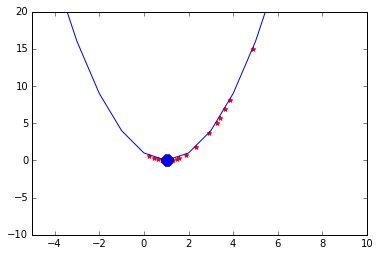

In [5]:
# Call random optomise function using Question 1 function 
pointlist,result  = RandSearch(f_Q1,100,0,20)
print('lowest x,y for Q1 ', result)

# Plot the results for random Q1 , first, create a baseline plot
baselist = [(x,f_Q1(x)) for x in range(-5,20)]
axis=[-5,10,-10,20]
title='Question 1 Random function'
PlotFuncScatter(baselist,pointlist,result,axis,title) 

('lowest x,y for Q2 start at 0 ', [(1.8183169471650062, -0.34894873746140914)])


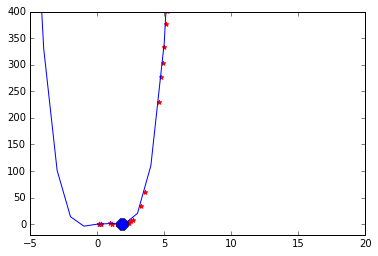

('lowest x,y for Q2 start at 1 ', [(2.0758929801322537, 0.32443885836311787)])


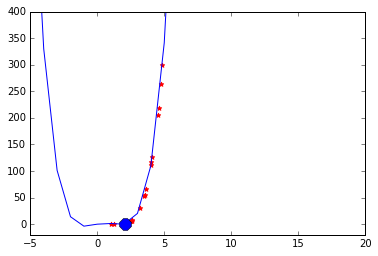

In [6]:
#Call random optomise function using Question 2 function with start value 0
#
pointlist,result  = RandSearch(f_Q2,100,0,20)
print('lowest x,y for Q2 start at 0 ', result)

# Plot the results for random Q2  , first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-5,10)]
axis=[-5,20,-20,400]
title='Question 2 Random function Value 0'
PlotFuncScatter(baselist,pointlist,result,axis,title) 

 
#Call random optomise function using Question 2 function with start value 1
pointlist,result  = RandSearch(f_Q2,100,1,20) 
print('lowest x,y for Q2 start at 1 ', result)

## Plot the results for random Q2  , first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-5,10)]
axis=[-5,20,-20,400]
title='Question 2 Random function Value 1'
PlotFuncScatter(baselist,pointlist,result,axis,title) 

##### Call the hillclimb function for questions 1 and 2 


all plots contain 
a) a baseline of the function
b) all points searched
c) the minimum (highlighted)


('HillClimb lowest x,y for Q1 forward start at 0 ', [(0.9999999999999999, 1.232595164407831e-32)])


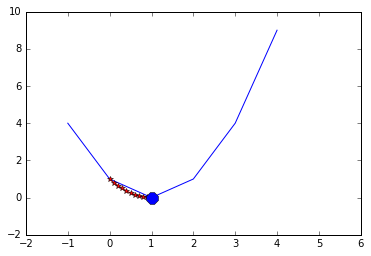

In [7]:
# Call hillclimb optomise function using Question 1 function 

pointlist,result  = HillClimb(f_Q1,0,.1)
print('HillClimb lowest x,y for Q1 forward start at 0 ', result)

## lot the results for HillClimb Q1 , first, create a baseline plot
baselist = [(x,f_Q1(x)) for x in range(-1,5)]
axis=[-2,6,-2,10]
title='Question 1 HillClimb function start at 0'
PlotFuncLine(baselist,pointlist,result,axis,title) 

('HillClimb lowest x,y for Q2 start at 0 ', [(-0.8999999999999999, -3.7584)])


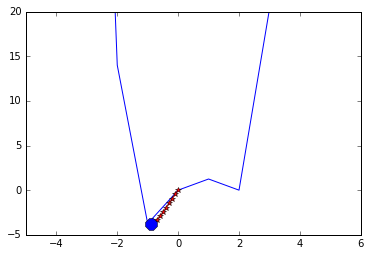

('HillClimb lowest x,y for Q2 start at 1', [(1.8000000000000007, -0.35639999999999983)])


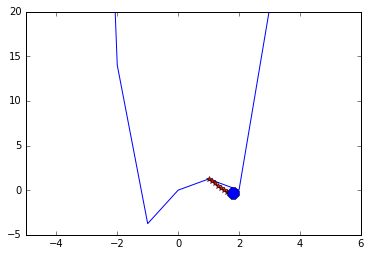

In [8]:
# Call hillclimb optomise function using Question 2 function 

# function call starting at 0
pointlist,result  = HillClimb(f_Q2,0,0.1)
print('HillClimb lowest x,y for Q2 start at 0 ', result)

## plot the results for HillClimb Q2 start at 0, first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-10,20)]
axis=[-5,6,-5,20]
title='Question 2 HillClimb function start at 0'
PlotFuncLine(baselist,pointlist,result,axis,title) 


# function call starting at 1
pointlist,result  = HillClimb(f_Q2,1,0.1)
print('HillClimb lowest x,y for Q2 start at 1', result)

## plot the results for HillClimb Q2 start at 1, first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-10,20)]
axis=[-5,6,-5,20]
title='Question 2 HillClimb function start at 1'
PlotFuncLine(baselist,pointlist,result,axis,title) 

##### Call the Gradient Descent for questions 1 and 2 

all plots contain 
a) a baseline of the function
b) all points searched
c) the minimum (highlighted)

('Gradient lowest x,y for Q1 ', [(1.0000000000000009, 7.888609052210118e-31)])


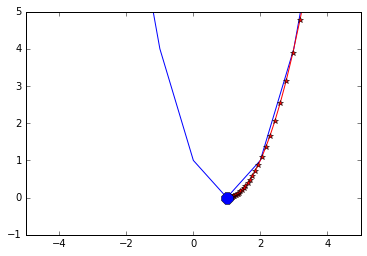

In [9]:
# Call Gradient Descent  function using Question 1 function 
pointlist,result = GradientDecent(f_Q1,f_Q1_slope,4,.05)
print('Gradient lowest x,y for Q1 ', result)

# Plot the results, first, create a baseline plot
baselist = [(x,f_Q1(x)) for x in range(-5,10)]
axis=[-5,5,-1,5]

title='Question 1 Gradient Descent '
PlotFuncLine(baselist,pointlist,result,axis,title) 


('Gradient lowest x,y for Q2 start at 0 ', [(-0.9460648948109964, -3.7765053180021564)])


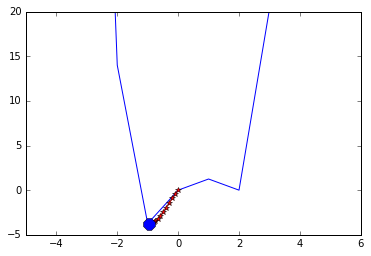

('Gradient lowest x,y for Q2 start at 1', [(1.7768123850991029, -0.35970689089653773)])


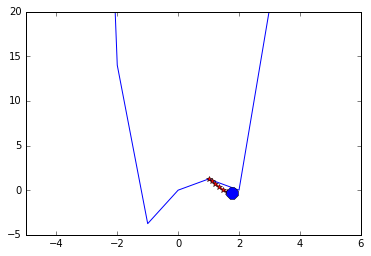

In [10]:
 # Call Gradient descent function using Question 2 function 

# function call starting at 0
pointlist,result = GradientDecent(f_Q2,f_Q2_slope,0,.02)

print('Gradient lowest x,y for Q2 start at 0 ', result)

## plot the results for Gradient Q2 start at 0, first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-10,20)]
axis=[-5,6,-5,20]
title='Question 2 Gradient function start at 0'
PlotFuncLine(baselist,pointlist,result,axis,title) 


# function call starting at 1
pointlist,result = GradientDecent(f_Q2,f_Q2_slope,1,.05)
print('Gradient lowest x,y for Q2 start at 1', result)

## plot the results for Gradient Q2 start at 1, first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-10,20)]
axis=[-5,6,-5,20]
title='Question 2 Gradient function start at 1'
PlotFuncLine(baselist,pointlist,result,axis,title) 

##### Call the Sim Annealing function for questions 1 and 2 

all plots contain 
a) a baseline of the function
b) all points searched
c) the minimum (highlighted)

('Sim Annealing for Q1 ', [(1.0000228236914506, 5.20920891430759e-10)])


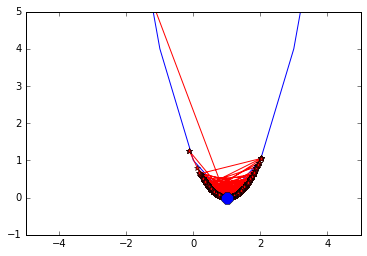

In [37]:
# Call Annealing function using Question 1 function 

pointlist,result  = Sim_Annealing(f_Q1,500,-3,5)

print('Sim Annealing for Q1 ', result)

# Plot the results, first, create a baseline plot
baselist = [(x,f_Q1(x)) for x in range(-5,10)]
axis=[-5,5,-1,5]

title='Sim Annealing for Q1'
PlotFuncLine(baselist,pointlist,result,axis,title) 

('Sim Annealing for Q2 ', [(-0.9459936715038033, -3.7765052733655122)])


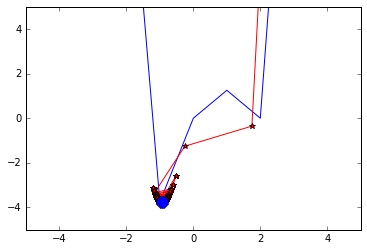

In [21]:
# Call Annealing function using Question 2 function 

pointlist,result  = Sim_Annealing(f_Q2,500,-3,4)

print('Sim Annealing for Q2 ', result)

# Plot the results, first, create a baseline plot
baselist = [(x,f_Q2(x)) for x in range(-5,10)]
axis=[-5,5,-5,5]

title='Sim Annealing for Q2'
PlotFuncLine(baselist,pointlist,result,axis,title) 